In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer


In [2]:
train_df= pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
train_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


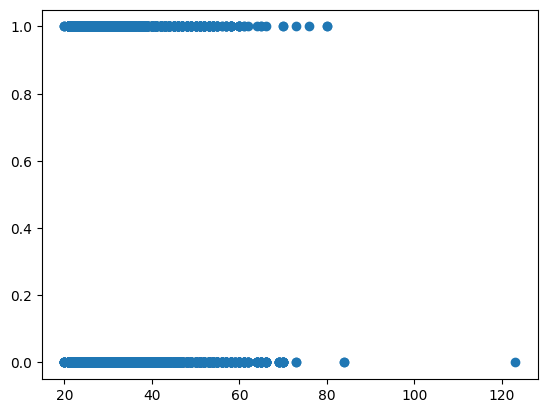

In [3]:
plt.scatter(train_df['person_age'], train_df['loan_status'])

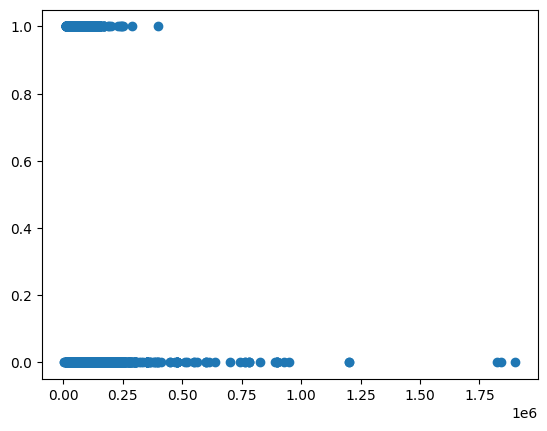

In [4]:
plt.scatter(train_df['person_income'], train_df['loan_status'])

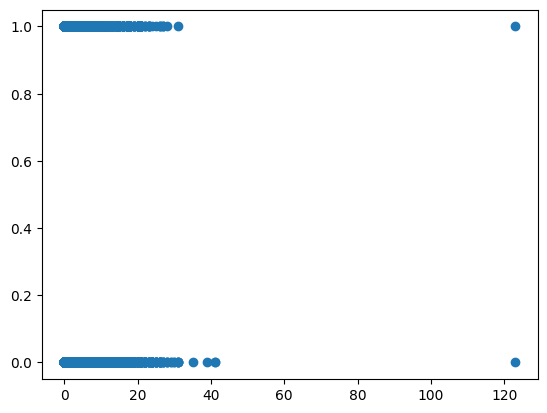

In [5]:
plt.scatter(train_df['person_emp_length'], train_df['loan_status'])

In [6]:
df_num= train_df.drop(['id', 'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis='columns')
df_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,37,35000,0.0,6000,11.49,0.17,14,0
1,22,56000,6.0,4000,13.35,0.07,2,0
2,29,28800,8.0,6000,8.90,0.21,10,0
3,30,70000,14.0,12000,11.11,0.17,5,0
4,22,60000,2.0,6000,6.92,0.10,3,0
...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,25000,15.95,0.21,10,0
58641,28,28800,0.0,10000,12.73,0.35,8,1
58642,23,44000,7.0,6800,16.00,0.15,2,1
58643,22,30000,2.0,5000,8.90,0.17,3,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

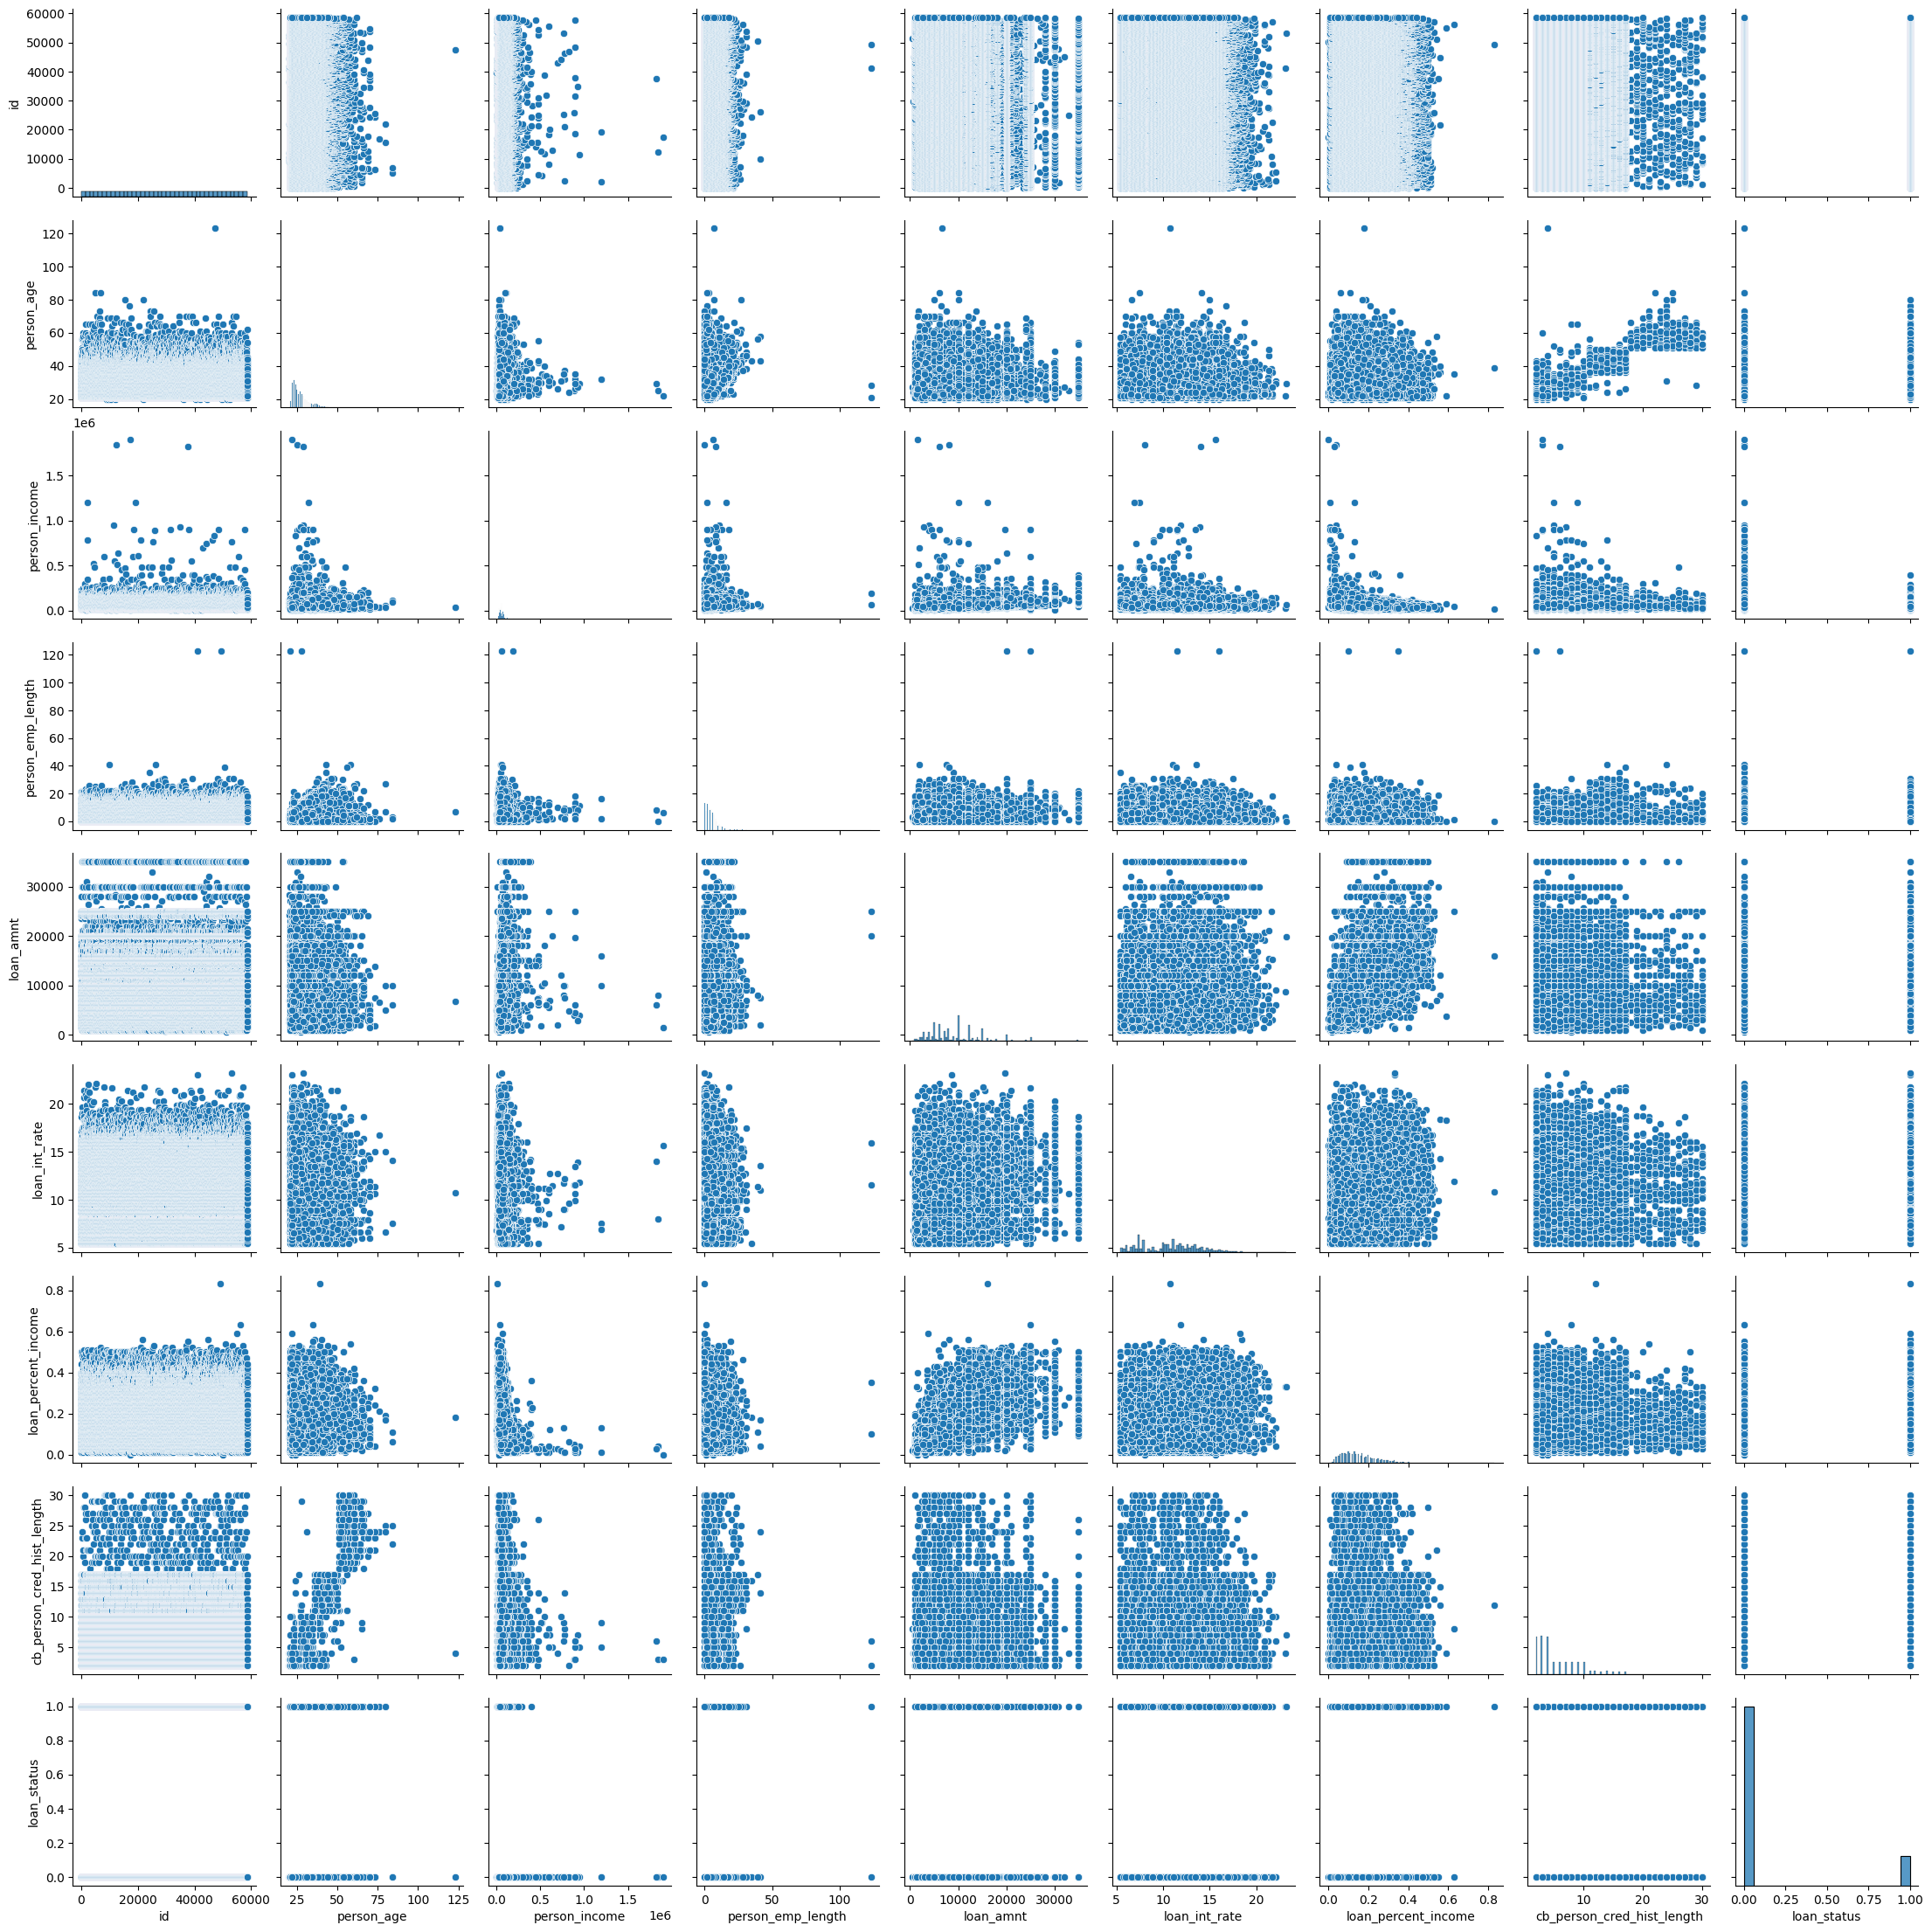

In [7]:
sn.pairplot(train_df)

In [8]:
df_num.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


<Axes: >

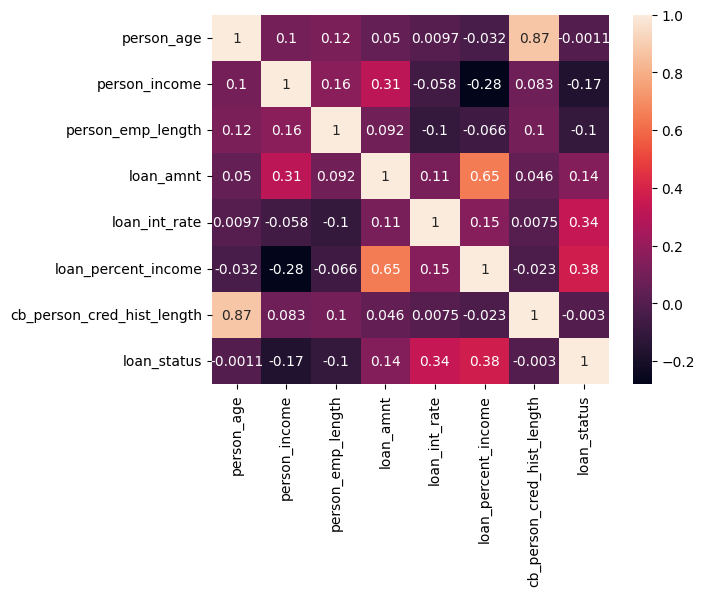

In [9]:
sn.heatmap(df_num.corr(), annot=True)

In [10]:
train_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

**REMOVING OUTLIERS**

<Axes: >

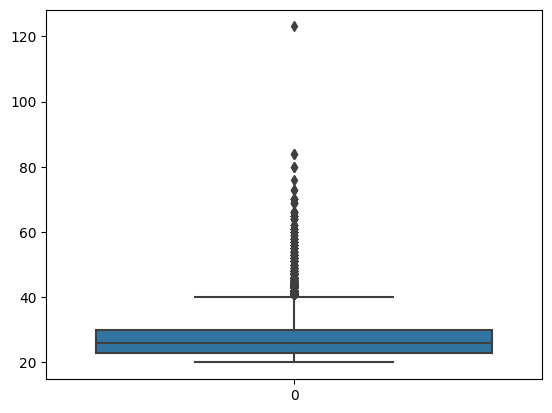

In [11]:
sn.boxplot(train_df['person_age'])

In [12]:
train_df= train_df[train_df['person_age']< train_df['person_age'].mean() + 3*(train_df['person_age'].std()) ]

In [13]:
train_df.shape

(57635, 13)

In [14]:
train_df= train_df[train_df['person_emp_length']< train_df['person_emp_length'].mean() + 3*(train_df['person_emp_length'].std())]

In [15]:
train_df.shape

(57075, 13)

In [16]:
train_df= train_df[train_df['person_income']< train_df['person_income'].mean() + 3*(train_df['person_income'].std())]

In [17]:
train_df.shape

(56579, 13)

In [18]:
train_df= train_df[train_df['loan_amnt']< train_df['loan_amnt'].mean() + 3*(train_df['loan_amnt'].std())]

In [19]:
train_df= train_df[train_df['loan_percent_income']< train_df['loan_percent_income'].mean() + 3*(train_df['loan_percent_income'].std())]

In [20]:
train_df= train_df[train_df['cb_person_cred_hist_length']< train_df['cb_person_cred_hist_length'].mean() + 3*(train_df['cb_person_cred_hist_length'].std())]

<Axes: >

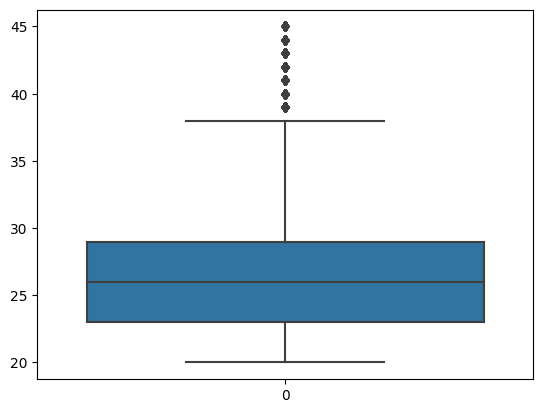

In [21]:
sn.boxplot(train_df['person_age'])

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55286 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          55286 non-null  int64  
 1   person_age                  55286 non-null  int64  
 2   person_income               55286 non-null  int64  
 3   person_home_ownership       55286 non-null  object 
 4   person_emp_length           55286 non-null  float64
 5   loan_intent                 55286 non-null  object 
 6   loan_grade                  55286 non-null  object 
 7   loan_amnt                   55286 non-null  int64  
 8   loan_int_rate               55286 non-null  float64
 9   loan_percent_income         55286 non-null  float64
 10  cb_person_default_on_file   55286 non-null  object 
 11  cb_person_cred_hist_length  55286 non-null  int64  
 12  loan_status                 55286 non-null  int64  
dtypes: float64(3), int64(6), object(4)
m

**ENCODING**

In [23]:
train_df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [24]:
train_df['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [25]:
train_df['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [26]:
train_df['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [27]:
train_df2= train_df.copy()

train_df2['cb_person_default_on_file'].replace({
    'Y':1,
    'N':0
},inplace= True )

train_df2['loan_grade'].replace({
    'A':7,
    'B':6,
    'C':5,
    'D':4,
    'E':3,
    'F':2,
    'G':1
}, inplace=True)

train_df2.head()

/tmp/ipykernel_17/1699963774.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df2['cb_person_default_on_file'].replace({
/tmp/ipykernel_17/1699963774.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df2['cb_person_default_on_file'].replace({
/tmp/ipykernel_17/1699963774.py:8: Futur

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,6,6000,11.49,0.17,0,14,0
1,1,22,56000,OWN,6.0,MEDICAL,5,4000,13.35,0.07,0,2,0
2,2,29,28800,OWN,8.0,PERSONAL,7,6000,8.90,0.21,0,10,0
3,3,30,70000,RENT,14.0,VENTURE,6,12000,11.11,0.17,0,5,0
4,4,22,60000,RENT,2.0,MEDICAL,7,6000,6.92,0.10,0,3,0


In [28]:
train_df3= pd.get_dummies(train_df2, drop_first=True,dtype=int)
train_df3.head()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,37,35000,0.0,6,6000,11.49,0.17,0,14,0,0,0,1,1,0,0,0,0
1,1,22,56000,6.0,5,4000,13.35,0.07,0,2,0,0,1,0,0,0,1,0,0
2,2,29,28800,8.0,7,6000,8.90,0.21,0,10,0,0,1,0,0,0,0,1,0
3,3,30,70000,14.0,6,12000,11.11,0.17,0,5,0,0,0,1,0,0,0,0,1
4,4,22,60000,2.0,7,6000,6.92,0.10,0,3,0,0,0,1,0,0,1,0,0


In [29]:
x= train_df3.drop(['id','loan_status'],axis='columns')

In [30]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [31]:
y= train_df3['loan_status']

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y,test_size=0.2)

In [33]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.28918418162912163

In [34]:
from sklearn.linear_model import LogisticRegression

lr2=LogisticRegression()
lr2.fit(x_train, y_train)
lr2.score(x_test, y_test)

0.8978115391571713

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(max_depth=10)
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.9479110146500271

In [36]:
#from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier(n_estimators=300, max_depth= 15,min_samples_split=20, min_samples_leaf=4, random_state=42)
#rf.fit(x_train, y_train)
#rf.score(x_test, y_test)


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, max_depth= 15,min_samples_split=20, min_samples_leaf=4, random_state=42)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)


0.6596363304669226

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=300, max_depth= 15,min_samples_split=10, min_samples_leaf=2, random_state=42)
rf2.fit(x_train, y_train)
rf2.score(x_test, y_test)


0.9527039247603545

In [39]:
test_df= pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
test_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [40]:
test_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [41]:
test_df2=test_df.drop(['id'],axis='columns')

In [42]:
test_df3= test_df2.copy()

test_df3['cb_person_default_on_file'].replace({
    'Y':1,
    'N':0
},inplace= True )

test_df3['loan_grade'].replace({
    'A':7,
    'B':6,
    'C':5,
    'D':4,
    'E':3,
    'F':2,
    'G':1
}, inplace=True)

test_df3.head()

/tmp/ipykernel_17/1176339473.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df3['cb_person_default_on_file'].replace({
/tmp/ipykernel_17/1176339473.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df3['cb_person_default_on_file'].replace({
/tmp/ipykernel_17/1176339473.py:8: FutureW

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,2,25000,15.76,0.36,0,2
1,26,96000,MORTGAGE,6.0,PERSONAL,5,10000,12.68,0.10,1,4
2,26,30000,RENT,5.0,VENTURE,3,4000,17.19,0.13,1,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,7,7000,8.90,0.14,0,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,4,15000,16.32,0.15,1,4


In [43]:
test_df4= pd.get_dummies(test_df3, drop_first=True,dtype=int)
test_df4.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,23,69000,3.0,2,25000,15.76,0.36,0,2,0,0,1,0,1,0,0,0
1,26,96000,6.0,5,10000,12.68,0.10,1,4,0,0,0,0,0,0,1,0
2,26,30000,5.0,3,4000,17.19,0.13,1,2,0,0,1,0,0,0,0,1
3,33,50000,4.0,7,7000,8.90,0.14,0,7,0,0,1,0,0,0,0,0
4,26,102000,8.0,4,15000,16.32,0.15,1,4,0,0,0,0,1,0,0,0


In [44]:
test_df5 = scaler.transform(test_df4)

In [45]:
pred=lr2.predict(test_df5)

In [46]:
id= test_df['id']

In [47]:
submission= pd.DataFrame({
    'id': id,
    'price': pred
})

submission.to_csv('submission.csv', index=False)